In [1]:
# Phase 2: Exploratory Data Analysis (EDA) & Insight Generation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Set plotting style for better aesthetics
sns.set_style("whitegrid")

In [3]:
# --- FILE SETUP ---
# Load the master file created
file_path = r'data\NEET_Master_Analysis_Data.csv'
try:
    df_master = pd.read_csv(file_path)
    print(f"✅ Master Data loaded successfully. Shape: {df_master.shape}")
except FileNotFoundError:
    print(f"🛑 Error: The file {file_path} was not found. Cannot proceed with Phase 2.")
    exit()

✅ Master Data loaded successfully. Shape: (4750, 21)


In [4]:
# Set the visualization backend for Plotly
pd.options.plotting.backend = "plotly"

In [5]:
## Finding the Inequality Hotspots (Bar Chart)
# Goal: Identify the Top 10 centers that are outperforming the national average by the largest margin.
# These are the statistical "hotspots" of high performance.


--- Analyzing Top 10 Centers by National Gap (Bar Chart) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_19916\72669252.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


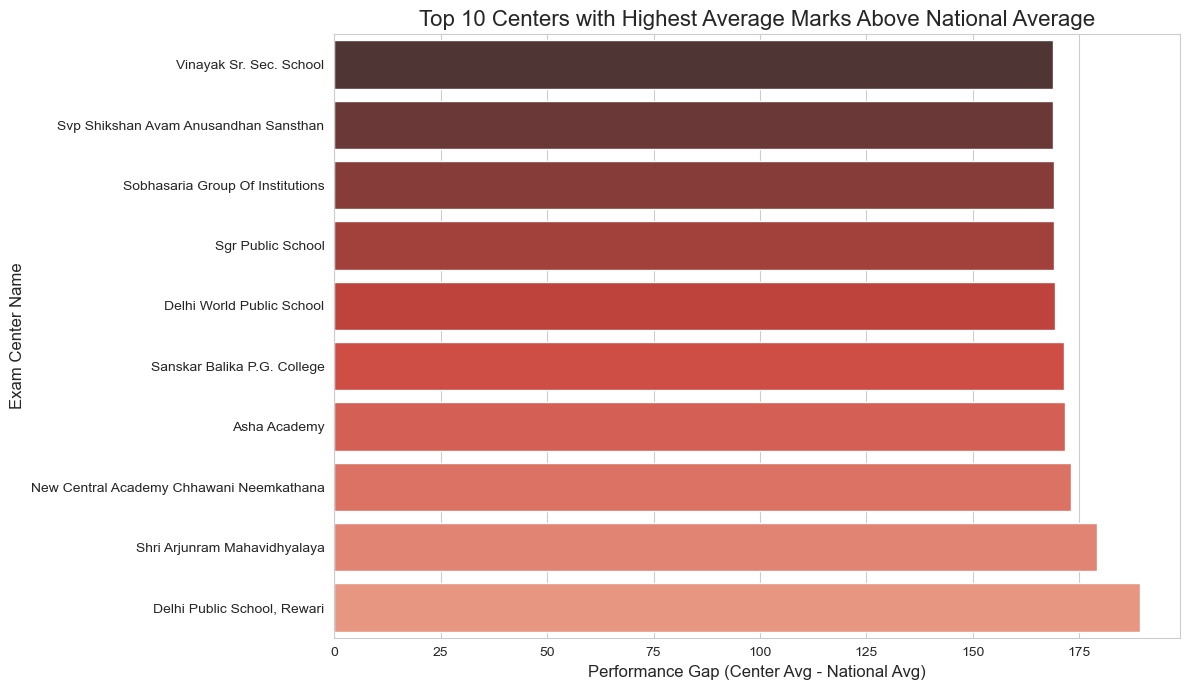

In [6]:
print("\n--- Analyzing Top 10 Centers by National Gap (Bar Chart) ---")

# Sort the data to find the centers with the largest positive gap
df_hotspots = df_master.sort_values(by='Center_v_National_Gap', ascending=False).head(10)

# Create the static visualization (Matplotlib/Seaborn)
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Center_v_National_Gap',
    y='center_name',
    data=df_hotspots,
    palette='Reds_d'
)

plt.title('Top 10 Centers with Highest Average Marks Above National Average', fontsize=16)
plt.xlabel('Performance Gap (Center Avg - National Avg)', fontsize=12)
plt.ylabel('Exam Center Name', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [7]:
## Visualizing Intra-State Inequality (Box Plot)
# Goal: Compare the spread of center performance across the largest states.
# A wide/tall box indicates high internal inequality within that state.


--- Distribution of Center Performance by State (Box Plot) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_19916\295299048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


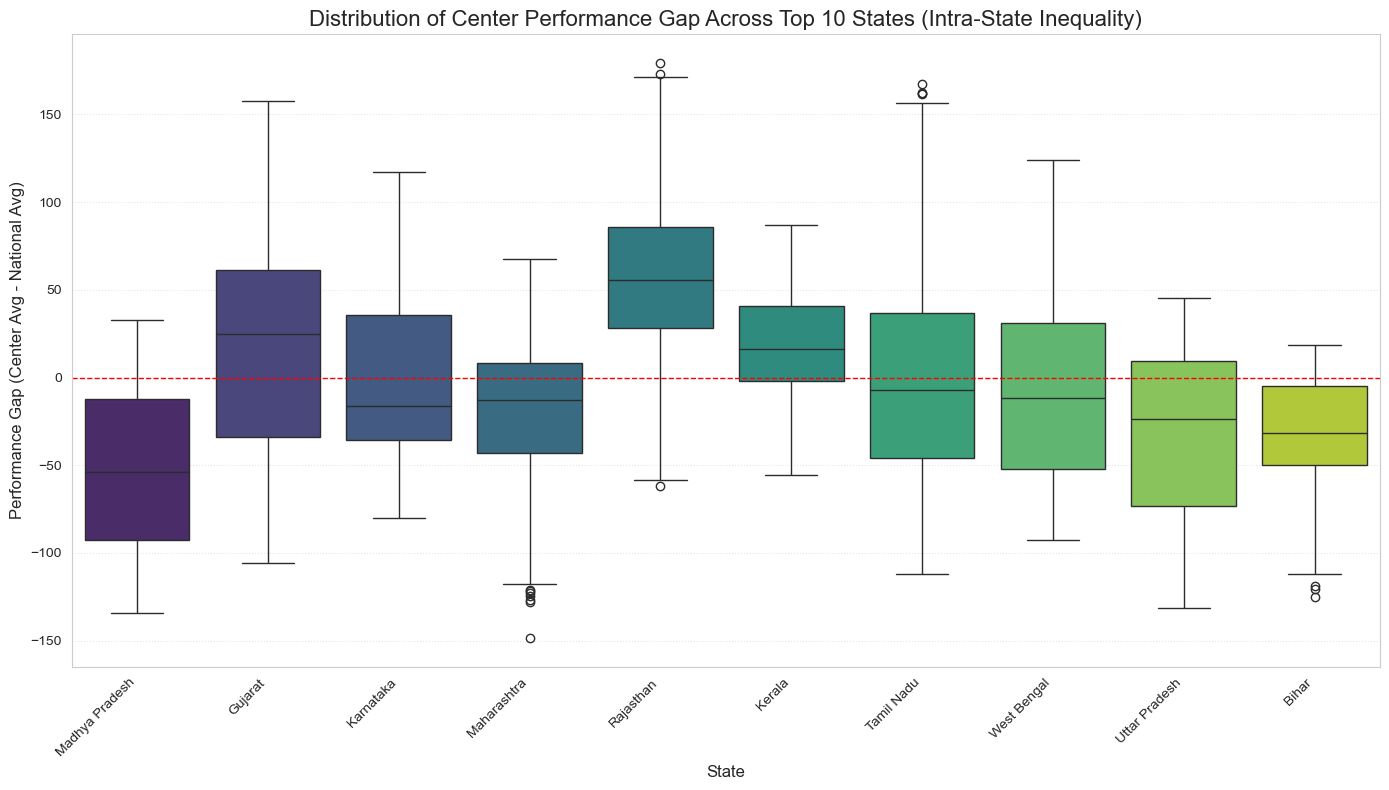

In [8]:
print("\n--- Distribution of Center Performance by State (Box Plot) ---")

# Identify the 10 states with the most students (to focus the plot)
top_states = df_master.groupby('state')['total_students'].sum().nlargest(10).index.tolist()
df_top_states = df_master[df_master['state'].isin(top_states)]

# Create the Box Plot visualization
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='state',
    y='Center_v_National_Gap',
    data=df_top_states,
    palette='viridis'
)

# Add a red line at 0 (the national average) for easy comparison
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Distribution of Center Performance Gap Across Top 10 States (Intra-State Inequality)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Performance Gap (Center Avg - National Avg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
## Preparing for Machine Learning (Anomaly Feature Scatter Plot)
# Goal: Visualize the relationship between performance and the *shape* of the score distribution (Skewness).
# This helps us understand which features are most useful for the ML model.

In [10]:
print("\n--- Visualizing Anomaly Features (Skewness vs. Performance Scatter Plot) ---")

# Using Plotly for an interactive scatter plot 
fig = px.scatter(
    df_master,
    x='Center_Skewness',
    y='Center_v_National_Gap',
    # Use Ultra_High_Score_Ratio for color intensity to highlight top performers
    color='Ultra_High_Score_Ratio',
    # Use total_students for size to show center volume
    size='total_students',
    hover_name='center_name',
    title='Performance Gap vs. Score Distribution Shape (Skewness)',
    labels={
        'Center_Skewness': 'Center Skewness (Shape of Score Distribution)',
        'Center_v_National_Gap': 'Performance Gap (Center Avg - National Avg)',
        'Ultra_High_Score_Ratio': 'Students > 700 / Total Students'
    },
    color_continuous_scale=px.colors.sequential.Plasma # Use a sequential color scale
)

# Add a horizontal line at the national average
fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.5)
fig.show()


--- Visualizing Anomaly Features (Skewness vs. Performance Scatter Plot) ---


In [11]:
print("\n✅ Phase 2 EDA Complete! Visual insights generated.")


✅ Phase 2 EDA Complete! Visual insights generated.
